#Regressione

###Importazione librerie

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


###Importazione e pre-processing dataset

In [ ]:
df = pd.read_csv('/content/used_car_price_dataset_extended.csv')
df.head(20)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
5,2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
6,2023,12.50,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes
7,2015,17.46,2000,Diesel,5,7701.84,BMW,Manual,Blue,NaN,0,Yes
8,2001,14.99,5000,Diesel,2,8730.52,Tesla,Manual,Silver,Partial,1,No
9,2020,19.59,4000,Petrol,4,10812.16,Chevrolet,Automatic,White,Partial,0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [ ]:
# Eliminazione colonne non rilevanti
df = df.drop('service_history', axis=1)

# Selezionamento delle feature
X = df.drop("price_usd", axis=1)
y = df["price_usd"]

# Identificazione colonne numeriche e categoriche
numeric_features = ["make_year", "mileage_kmpl", "engine_cc", "owner_count", "accidents_reported"]
categorical_features = ["fuel_type", "brand", "transmission", "color", "insurance_valid"]

# Costruzione pipeline di preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

Il preprocessing scelto esegue le seguenti funzioni:

• Per le colonne numeriche usiamo lo StandardScaler che trasforma ogni feature numerica in modo che abbia Media = 0 e Deviazione standard = 1

• Per le colonne categoriche utilizziamo il OneHotEncoder che crea una colonna binaria (0/1) per ogni categoria possibile

###Costruzione del modello

Per il primo tentativo di modello utilizziamo un'architettura semplice:

• Primo layer - 64 neuroni

• Secondo layer - 32 neuroni

• Output layer - 1 neurone

Struttura a imbuto: gradualmente riduce la dimensionalità, forzando il modello a imparare rappresentazioni sempre più compresse e rilevanti per la predizione finale.

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applicazione preprocessor
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Modello semplice di regressione con rete neurale
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_prep.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Callback per ridurre il learning rate se la val_loss non migliora
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Addestramento modello
history = model.fit(X_train_prep, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 59793972.0000 - mae: 7200.9463 - val_loss: 56227216.0000 - val_mae: 6995.7168
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49185448.0000 - mae: 6460.8135 - val_loss: 26628264.0000 - val_mae: 4614.0464
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18118756.0000 - mae: 3615.1084 - val_loss: 4065546.2500 - val_mae: 1537.7606
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3213907.7500 - mae: 1380.6379 - val_loss: 2141210.5000 - val_mae: 1141.5311
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2142682.0000 - mae: 1148.7865 - val_loss: 1744234.1250 - val_mae: 1026.6954
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1679651.8750 - mae: 1015.5424 - val_loss: 1507264.1250 - val_mae: 956.6094
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1496957.3750 - mae: 960.3063 - val_loss: 1357717.7500 - val_mae: 914.9079
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

###Analisi conclusive del modello

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1083180.0000 - mae: 831.5536
MAE sul test set: 836.20 USD


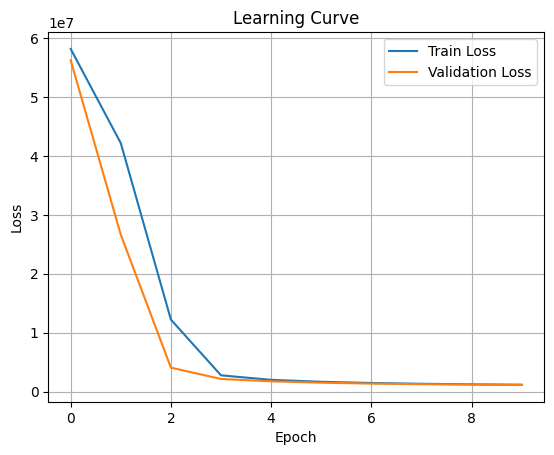

In [ ]:
# Valutazione del test
loss, mae = model.evaluate(X_test_prep, y_test)
print(f"MAE sul test set: {mae:.2f} USD")

# Grafico della curva di apprendimento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Learning Curve')
plt.show()


L'apprendimento è rapido e stabile.

Dalla settima epoca iniziamo a notare una stabilizzazione del modello, con miglioramenti sempre più piccoli.

Loss e mae della validation sono leggermente più bassi rispetto al train, ciò indica nessun overfitting evidente.

Eseguiamo un'ulteriore verifica per stabilire se il modello può fare al caso nostro


Statistiche descrittive per il prezzo (price_usd):
count    10000.000000
mean      7179.754532
std       2795.270940
min       1000.000000
25%       5176.547500
50%       6961.260000
75%       8993.732500
max      17647.630000
Name: price_usd, dtype: float64

Confronto MAE con la scala del target:
- MAE (Mean Absolute Error): 836.20 USD
- Deviazione Standard del prezzo: 2795.27 USD
- Intervallo (Max - Min) del prezzo: 16647.63 USD


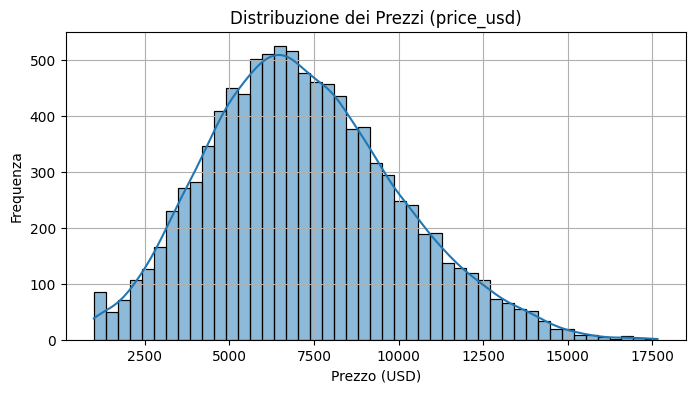

In [ ]:
# Confrontiamo l'mae con la scala dei dati target
import matplotlib.pyplot as plt
# Analisi della scala dei dati target (price_usd)
print("\nStatistiche descrittive per il prezzo (price_usd):")
print(y.describe())

# Confronto MAE con la scala del target
print(f"\nConfronto MAE con la scala del target:")
print(f"- MAE (Mean Absolute Error): {mae:.2f} USD")
print(f"- Deviazione Standard del prezzo: {y.std():.2f} USD")
print(f"- Intervallo (Max - Min) del prezzo: {(y.max() - y.min()):.2f} USD")

# Opzionale: visualizzazione della distribuzione del target
plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True)
plt.title('Distribuzione dei Prezzi (price_usd)')
plt.xlabel('Prezzo (USD)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

# Intepretazione:
# Un MAE basso rispetto alla deviazione standard o all'intervallo del target suggerisce che il modello ha buone prestazioni.
# Un MAE elevato rispetto a questi valori indica che le previsioni del modello hanno un errore medio assoluto significativo rispetto alla variabilità intrinseca dei dati.
# La distribuzione del target fornisce un contesto visivo per valutare il MAE. Ad esempio, un MAE di 1000 USD potrebbe essere buono per un target che varia tra 10,000 e 50,000 USD, ma meno buono per un target che varia tra 1,000 e 5,000 USD.

Le performance del modello sono molto soddisfacenti. L'errore di ~836 USD su prezzi medi di ~7.179 USD indica che il modello ha catturato efficacemente i pattern nei dati.